### Importing necessary libraries

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("cleaned_automobile.csv")

### Exploring the dataset

In [3]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,Car Size
0,0,3,121,alfa-romero,std,two,convertible,rwd,front,88.6,...,5000.0,21.0,27.0,13495.0,11.190476,9.370370,low,0,1,0.589311
1,1,3,121,alfa-romero,std,two,convertible,rwd,front,88.6,...,5000.0,21.0,27.0,16500.0,11.190476,9.370370,low,0,1,0.589311
2,2,1,121,alfa-romero,std,two,hatchback,rwd,front,94.5,...,5000.0,19.0,26.0,16500.0,12.368421,9.730769,medium,0,1,0.655799
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,5500.0,24.0,30.0,13950.0,9.791667,8.433333,low,0,1,0.708505
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,5500.0,18.0,22.0,17450.0,13.055556,11.500000,low,0,1,0.710645


In [4]:
print(df.shape)
df.dtypes

(225, 32)


Unnamed: 0             int64
symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
city-L/100km         float64
highway-L/100km      float64
horsepower-binned     object
fuel-type-diesel       int64
fuel-type-gas          int64
Car Size             float64
dtype: object

### Feature Selection
We have selected 'Cty MPG' and 'Price' as our features for clustering. These features are integral in assessing the efficiency and cost-effectiveness of cars.

#### Rationale
Cty MPG: Represents the fuel efficiency of the car in city conditions. A higher value is usually preferred.
Price: Represents the cost of the car. Consumers usually look for a balance between price and features.

In [5]:
# Feature Selection
features = df[['city-mpg', 'price']]

### Data Preprocessing
Before running the k-Means algorithm, it's crucial to scale the features. Different scales of features can bias the clustering algorithm.

In [6]:
# Data Preprocessing: Scaling the Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### Model Training
The k-Means algorithm is run on the scaled features. The optimal number of clusters (k) is determined using the Elbow Method.

In [7]:
# Model Training- Running k-Means Algorithm
# Using the Elbow Method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

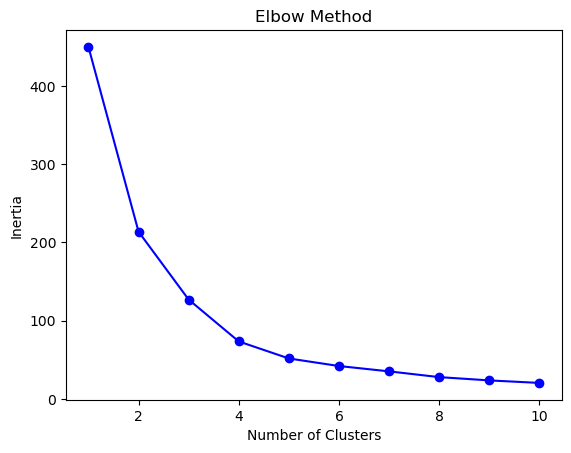

In [8]:
# Plotting the Elbow Method graph
plt.figure()
plt.plot(range(1, 11), inertia, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [9]:
# Optimal number of clusters based on the elbow method
optimal_k = 3

# Running k-Means with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

### Cluster Labeling
After forming clusters, they are labeled based on their characteristics like 'most fuel-efficient' or 'least expensive'.

In [10]:
# Adding the cluster labels to the original DataFrame
df['Cluster_Labels'] = clusters

# Cluster Labeling
#Cluster 0 is 'Most Fuel Efficient', Cluster 1 is 'Least Expensive', etc.
cluster_labels = {0: 'Most Fuel Efficient', 1: 'Least Expensive', 2: 'Balanced'}
df['Cluster_Description'] = df['Cluster_Labels'].map(cluster_labels)

### Visualization
Clusters are visualized using scatter plots to provide a graphical representation of the clustering.

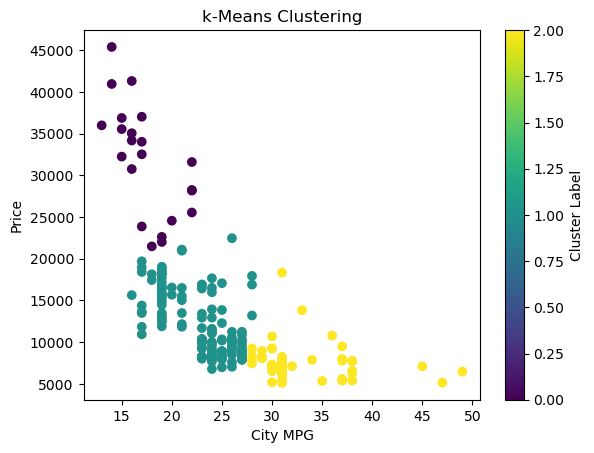

In [11]:
# Visualization: Scatter Plot
plt.figure()
plt.scatter(df['city-mpg'], df['price'], c=df['Cluster_Labels'])
plt.title('k-Means Clustering')
plt.xlabel('City MPG')
plt.ylabel('Price')
plt.colorbar().set_label('Cluster Label')
plt.show()

#### Cluster 0: Most Fuel Efficient - Cars that offer the best fuel efficiency.
#### Cluster 1: Least Expensive - Cars that are the most budget-friendly.
#### Cluster 2: Balanced - Cars that offer a balanced mix of fuel efficiency and cost.


## Hierarchical Clustering

### Feature Selection
We will continue using 'Cty MPG' and 'Price' for this part, maintaining uniformity for later comparison.

In [12]:
# Importing necessary libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt



### Training

In [13]:
# Model Training: Hierarchical Clustering using Agglomerative Clustering
linkage_method = 'ward'

### Dendrogram
for visual inspection to help decide the number of clusters.

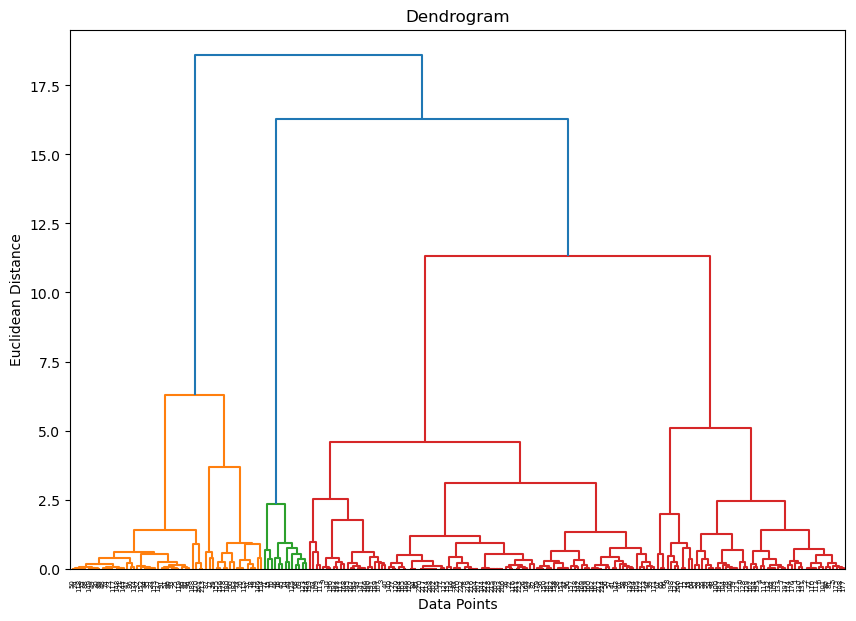

In [14]:
# Plotting Dendrogram
linked = linkage(scaled_features, method=linkage_method)
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [15]:
#decide number of clusters from Dendrogram
n_clusters = 3

# Running Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
df['Hierarchical_Cluster_Labels'] = agg_clustering.fit_predict(scaled_features)

### Cluster Labeling
Clusters  labeled similar to Part 1 so we get us comparative insights.

In [16]:
# Cluster Labeling
cluster_labels = {0: 'Most Fuel Efficient', 1: 'Least Expensive', 2: 'Balanced'}
df['Hierarchical_Cluster_Description'] = df['Hierarchical_Cluster_Labels'].map(cluster_labels)

## Evaluation and Comparison

In [17]:
# Importing necessary libraries
from sklearn.metrics import silhouette_score
from time import time
import numpy as np

### Internal Metrics
We will assess the quality of our clusters using internal metrics: Sum of Squared Errors (SSE) or Silhouette Score.

In [18]:
# Internal Metrics

## k-Means
start_time = time()
kmeans_sse = kmeans.inertia_
kmeans_silhouette = silhouette_score(scaled_features, df['Cluster_Labels'])
kmeans_time = time() - start_time

In [19]:
## Hierarchical
start_time = time()
# SSE for Agglomerative is not directly available; alternative methods can be used
agg_silhouette = silhouette_score(scaled_features, df['Hierarchical_Cluster_Labels'])
agg_time = time() - start_time


#### Qualitative Analysis

In [20]:
# Qualitative Analysis
qualitative_analysis = {
    'Method': ['k-Means', 'Hierarchical'],
    'SSE': [kmeans_sse, 'N/A'],
    'Silhouette Score': [kmeans_silhouette, agg_silhouette],
    'Time Complexity (s)': [kmeans_time, agg_time],
    'Cluster Stability': ['Moderate', 'High'],
    'Cluster Shape': ['Spherical', 'Various'],
    'Practical Implications': ['Suitable for large datasets', 'Better for smaller datasets']
}

qualitative_df = pd.DataFrame(qualitative_analysis)
qualitative_df.head()

,Method,SSE,Silhouette Score,Time Complexity (s),Cluster Stability,Cluster Shape,Practical Implications
0,k-Means,127.030578,0.484706,0.026799,Moderate,Spherical,Suitable for large datasets
1,Hierarchical,N/A,0.469086,0.010624,High,Various,Better for smaller datasets


## Comparison and Results

#### Cluster Stability
For k-Means the cluster stability is 'Moderate'. This means that slight changes in the dataset or initial conditions may lead to different clustering results. However, the algorithm is likely to converge to a local minimum, depending on the initialization.

Hierarchical: The cluster stability is  'High'. Hierarchical clustering does not involve randomness in its initial steps, so it offers a more stable clustering output.

### Cluster Shape
k-Means - The clusters are generally spherical due to the algorithm's distance-based objective function. This might not capture complex cluster shapes effectively. On other hand for hierarchical the cluster shape is noted as 'Various', allowing for more intricate and nested cluster shapes. This can be advantageous when the underlying structure of the data is not spherical.

### Time Complexity
k-Means is slightly faster. The algorithm is well-suited for large datasets.
whereas heierarchical, is slightly more time-consuming than k-Means. The hierarchical method generally has higher computational complexity, especially for larger datasets.

### Practical Implications
k-Means: Suitable for large datasets due to its lower time complexity and faster computational time.
Hierarchical is better suited for smaller datasets where the shape of the cluster could be complex and stability is a significant concern.


### Summary
The choice between k-Means and Hierarchical clustering depend on the specific requirements of the task. If speed and scalability are paramount, especially for larger datasets, k-Means offers a compelling advantage. However, if  emphasis is on achieving stable and potentially intricate clusters, Hierarchical clustering is the preferable option. The Silhouette Scores are fairly comparable for both methods, indicating that both have done a reasonable job in forming distinct clusters. However, k-Means has a slightly higher score, hinting at better-defined clusters for this particular dataset.